In [120]:
import pandas as pd
base = pd.read_csv('census.csv')
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [121]:
base['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [122]:
def convert_class(label):
    if label is ' >50':
        return 1
    else: 
        return 0

In [123]:
base['income'] = base['income'].apply(convert_class)
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [124]:
# axis = 1 means drop by column
x = base.drop('income', axis=1)
x.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [125]:
y = base['income']
type(y)

pandas.core.series.Series

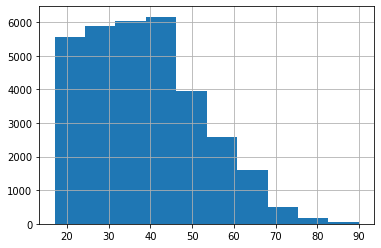

In [126]:
%matplotlib inline
base.age.hist()

In [100]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.__version__

'2.1.0'

In [127]:
age = tf.feature_column.numeric_column('age')
# Categorize the attribute age in some categories, instead of values decimals
age_categorical = [tf.feature_column.bucketized_column(
    age, 
    boundaries=[20, 30, 40, 50, 60, 70, 80, 90]
)]

In [128]:
age_categorical

[BucketizedColumn(source_column=NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80, 90))]

In [129]:
base.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [130]:
name_columns_categoricals = ['workclass', 
                             'education', 
                             'marital-status',
                             'occupation', 
                             'relationship',
                             'race',
                             'sex',
                             'native-country']

# mapping the categorical columns
columns_categoricals = [
    tf.feature_column.categorical_column_with_vocabulary_list( 
        key= c, vocabulary_list=x[c].unique()
    ) 
    for c in name_columns_categoricals
]

print(columns_categoricals)

[VocabularyListCategoricalColumn(key='workclass', vocabulary_list=(' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='education', vocabulary_list=(' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='marital-status', vocabulary_list=(' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='occupation', vocabulary_list=(' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sal

In [131]:
# create column numericas
columns_numericals = ['final-weight', 
                      'education-num',
                       'capital-gain',
                      'capital-loos',
                      'hour-per-week']

columns_numericals = [ tf.feature_column.numeric_column(key=c) 
                      for c in columns_numericals]

print(columns_numericals)

[NumericColumn(key='final-weight', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='education-num', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='capital-gain', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='capital-loos', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='hour-per-week', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [132]:
final_columns = age_categorical + columns_categoricals + columns_numericals 
final_columns

[BucketizedColumn(source_column=NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80, 90)),
 VocabularyListCategoricalColumn(key='workclass', vocabulary_list=(' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='education', vocabulary_list=(' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='marital-status', vocabulary_list=(' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed'), dtype=tf.string, default_value=-1, num_oov_buck

In [133]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y , test_y = train_test_split(x, y, test_size=0.3)

In [134]:
function_training = tf.estimator.inputs.pandas_input_fn(
    x = train_x,
    y = train_y,
    batch_size=32,
    num_epochs=None,
    shuffle=True
)

In [135]:
 # create a classifier 
classifier = tf.estimator.LinearClassifier(feature_columns=final_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpp2np6ey8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [136]:
classifier.train(input_fn=function_training, steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpp2np6ey8/model.ckpt.
INFO:tensorflow:loss = 22.18071, step = 1
INFO:tensorflow:global_step/sec: 41.6303
INFO:tensorflow:loss = 0.0, step = 101 (2.403 sec)
INFO:tensorflow:global_step/sec: 150.485
INFO:tensorflow:loss = 0.0, step = 201 (0.665 sec)
INFO:tensorflow:global_step/sec: 142.731
INFO:tensorflow:loss = 0.0, step = 301 (0.700 sec)
INFO:tensorflow:global_step/sec: 207.208
INFO:tensorflow:loss = 0.0, step = 401 (0.483 sec)
INFO:tensorflow:global_step/sec: 149.298
INFO:tensorflow:loss = 0.0, step = 501 (0.670 sec)
INFO:tensorflow:global_step/sec: 167.198
INFO:tensorflow:loss = 0.0, step = 601 (0.607 sec)
INFO:tensorflow:global_step/sec: 186.634
INFO:tensorflow:loss = 0.0, step = 701 (0.540 sec)
IN

INFO:tensorflow:global_step/sec: 176.876
INFO:tensorflow:loss = 0.0, step = 8601 (0.571 sec)
INFO:tensorflow:global_step/sec: 117.797
INFO:tensorflow:loss = 0.0, step = 8701 (0.858 sec)
INFO:tensorflow:global_step/sec: 160.481
INFO:tensorflow:loss = 0.0, step = 8801 (0.611 sec)
INFO:tensorflow:global_step/sec: 206.916
INFO:tensorflow:loss = 0.0, step = 8901 (0.484 sec)
INFO:tensorflow:global_step/sec: 135.103
INFO:tensorflow:loss = 0.0, step = 9001 (0.739 sec)
INFO:tensorflow:global_step/sec: 134.931
INFO:tensorflow:loss = 0.0, step = 9101 (0.743 sec)
INFO:tensorflow:global_step/sec: 201.359
INFO:tensorflow:loss = 0.0, step = 9201 (0.496 sec)
INFO:tensorflow:global_step/sec: 147.581
INFO:tensorflow:loss = 0.0, step = 9301 (0.677 sec)
INFO:tensorflow:global_step/sec: 151.155
INFO:tensorflow:loss = 0.0, step = 9401 (0.659 sec)
INFO:tensorflow:global_step/sec: 244.442
INFO:tensorflow:loss = 0.0, step = 9501 (0.409 sec)
INFO:tensorflow:global_step/sec: 181.615
INFO:tensorflow:loss = 0.0, s

In [137]:
function_prevision = tf.estimator.inputs.pandas_input_fn(
    x=test_x, 
    y=test_y,
    batch_size=32, 
    shuffle=False
)

In [138]:
previsions = classifier.predict(input_fn=function_prevision)

In [139]:
list(previsions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpp2np6ey8/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-20230.578], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-52739.957], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-28211.158], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-31670.578], dtype=float32),
  'logistic': array([0

In [140]:
final_prevision = []

for p in classifier.predict(input_fn=function_prevision):
    final_prevision.append(p['class_ids'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpp2np6ey8/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [141]:
final_prevision

[array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),

In [142]:
from sklearn.metrics import accuracy_score

precision = accuracy_score(final_prevision, test_y)
precision

1.0

array([0])